# Рубежная контрольная работа

*Эту работу выполнять не обязательно. Баллы, набранные за эту контрольную работу просуммируются с баллами, которые будут набраны за контрольную работу 2 и выставлены как оценка за экзамен "автоматом". Если вы не выполните эту работу, переписать её будет невозможно, просто приходите на экзамен и добирайте баллы там.*

Сделайте копию ноутбука

Присвойте переменной `v` свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [ ]:
from datetime import datetime
current_datetime = datetime.now()
print(current_datetime)
v = 339576 # по умолчанию вписан мой номер

2023-10-30 12:43:49.973208


## Описание метрического алгоритма

Пусть задана обучающая выборка пар "объект-ответ" $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}.$

Пусть на множестве объектов задана функция расстояния $\rho(x,x')$. Чем больше значение этой функции, тем менее схожими являются два объекта $x, x'$.
В простейшем случае используется евклидова метрика: $\rho(x,x') = \sqrt {\sum _{i=1}^{n}(x_{i}-x'_{i})^{2}}$,

Для произвольного объекта $u$ расположим объекты обучающей выборки $x_i$ в порядке возрастания расстояний до $u$:

$$\rho(u,x_{1; u}) \leq  \rho(u,x_{2; u}) \leq \cdots \leq \rho(u,x_{m; u}),$$
где через $x_{i; u}$ обозначается тот объект обучающей выборки, который является $i$-м соседом объекта $u$. Аналогичное обозначение введём и для ответа на $i$-м соседе: $y_{i; u}$. Таким образом, произвольный объект $u$ порождает свою перенумерацию выборки. В наиболее общем виде алгоритм ближайших соседей есть:
$$a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^k \bigl[ y_{i; u}=y \bigr] w(i,u),$$
где $w(i,u)$ - заданная весовая функция, которая оценивает степень важности $i$-го соседа для классификации объекта $u$. Естественно полагать, что эта функция не отрицательна и не возрастает по $i$ (поскольку чем дальше объект, тем меньший вклад он должен вносить в пользу своего класса).

По-разному задавая весовую функцию, можно получать различные варианты метода ближайших соседей.

$w(i,u) = [i=1]$ - простейший метод ближайшего соседа;

$w(i,u) = [i\leq k]$ - метод $k$ ближайших соседей;

$w(i,u) = [i\leq k] q^i$ - метод $k$ экспоненциально взвешенных ближайших соседей, где предполагается константа $q < 1$




**Использование ядер сглаживания**

Для избежания неоднозначности ответа при классификации в качестве весовой функции $w(i, u)$ используют функцию ядра $K(r)$

Примеры ядер:

Triangular: ${\displaystyle K(r)=(1-|r|)}$,

Parabolic: ${\displaystyle K(r)={\frac {3}{4}}(1-r^{2})}$,

Tricube: ${\displaystyle K(r)={\frac {70}{81}}(1-{\left|r\right|}^{3})^{3}}$.

**Метод парзеновского окна**

Алгоритм $k$ ближайших соседей можно обобщить с помощью функции ядра. Рассмотрим два способа, которыми это можно сделать.

Метод парзеновского окна фиксированной ширины  $h$:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Метод парзеновского окна переменной ширины:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$

Таким образом классификаторы, полученные при использовании этих методов, можно записать в следующем виде

Фиксированной ширины: $$a_h = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^k \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Переменной ширины (фиксированное число соседей):
$$a_k = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^k \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$


## Задание 1 (7 баллов)

В задании требуется написать свою реализацию метрического алгоритма.

В качестве расстояния между объектами в этом задании используйте евклидово расстояние.

В качестве функции ядра используйте Parabolic.

Для выбора варианта, запустите код в следующей ячейке



In [ ]:
if (int(str(v)[3]) % 2) == 0:
  print ('1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать F1-меру')
else:
  print ('1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать accuracy')

if (int(str(v)[3]) % 2) == 0:
  print ('1.2 Построить график зависимости метрики качества на обучающей выборке от k')
else:
  print ('1.2 Построить график зависимости метрики качества на контрольной выборке от h')

1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать accuracy
1.2 Построить график зависимости метрики качества на контрольной выборке от h


In [ ]:
from scipy.spatial.distance import euclidean
from collections import Counter
import numpy as np


class myKnn:
    def __init__(self, k=5, h=0.5):
        self.k = k
        self.h = h

    @staticmethod
    def parabolic(r):
        return 3 / 4 * (1 - r ** 2)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict_one(self, x):
      dist = np.array([euclidean(x, x_train) for x_train in self.X])
      weights = self.parabolic(dist / self.h)

      k_nearest = np.argsort(weights)[-self.k:]

      k_nearest_tags = self.y[k_nearest]

      most_common = Counter(k_nearest_tags).most_common(1)

      return most_common[0][0]

Протестирйуте эту реализацию на наборе данных breast_cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

knn = myKnn(k=5, h=0.5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9590643274853801


h=0.1, accuracy: 0.9590643274853801
h=0.2, accuracy: 0.9590643274853801
h=0.30000000000000004, accuracy: 0.9590643274853801
h=0.4, accuracy: 0.9590643274853801
h=0.5, accuracy: 0.9590643274853801
h=0.6, accuracy: 0.9590643274853801
h=0.7000000000000001, accuracy: 0.9590643274853801
h=0.8, accuracy: 0.9590643274853801
h=0.9, accuracy: 0.9590643274853801
h=1.0, accuracy: 0.9590643274853801
Best h : 0.1


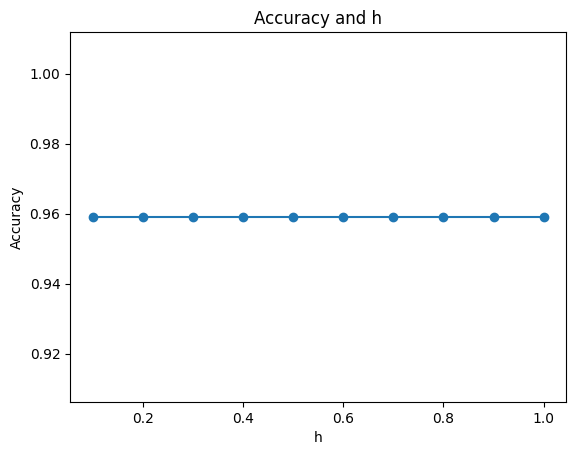

In [ ]:
import matplotlib.pyplot as plt

best_h = None
best_accuracy = 0

h_values = np.linspace(0.1, 1, 10)
accuracy_scores = []

for h in h_values:
    knn = myKnn(k=5, h=h)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy_v = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy_v)
    print(f"h={h}, accuracy: {accuracy_v}")

    if accuracy_v > best_accuracy:
        best_accuracy = accuracy_v
        best_h = h

print(f"Best h : {best_h}")

plt.plot(h_values, accuracy_scores, marker='o')
plt.xlabel('h')
plt.ylabel('Accuracy')
plt.title('Accuracy and h')
plt.show()

Может понадобиться предобработка данных

Штрафы:
* отсутствие реализации алгоритма (4 балла)
* ошибки в реализации алгоритма (2 балла)
* отсутствие настройки гиперпараметра (2 балла)
* ошибки в настройке гиперпараметра (1 балл)
* отсутствие графика (1 балл)

# Задание 2 (4 балла)

Требуется реализовать метрический алгоритм для предсказания действительного числа (то есть как в задаче регрессии, а не как в задаче классификации).

В задании 2 **не** обязательно использовать ядра и метод парзеновского окна.

Во этом задании в качестве исходных данных используется словарь кинокритиков и выставленных ими оценок

In [ ]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 3.5},
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0,
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0},
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

По этому словарю нужно сделать Dataframe в pandas. Строки это критики, столбцы - названия фильмов. На пересечении поставленные оценки. При отсуствии оценки у критика за фильм в датафрейме нужно поставить 0.

Для выбора варианта, запустите код в следующей ячейке

In [ ]:
if (int(str(v)[4]) % 2) == 0:
  print ('2.1 Сделайте предсказание оценок для критика Michael Phillips по фильмам, которые он ещё не видел')
else:
  print ('2.1 Сделайте предсказание оценок для фильма Just My Luck по критикам, которые его ещё не видели')
print ('2.2 Объясните как оценить качество полученного предcказания')

Штрафы:
* отсутствие реализации алгоритма (2 балла)
* ошибки в реализации алгоритма (1 балл)
* отсутствие тестирования алгоритма (1 балл)
* отсутствие объяснения оценки качества алгоритма (1 балл)

После завершения контрольной работы, дайте ссылку на ноутбук в отдельном followup в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [ ]:
current_datetime = datetime.now()
print(current_datetime)

2023-10-30 13:46:28.921375
